In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount your Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/MCI Women_s Files/Jsonl_distance_with_ball_and_pos.csv")
df.head()

,period,frameIdx,gameClock,wallClock,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_2_playerId,...,homePlayers_7_position,awayPlayers_7_position,homePlayers_8_position,awayPlayers_8_position,homePlayers_9_position,awayPlayers_9_position,homePlayers_10_position,awayPlayers_10_position,homePlayers_11_position,awayPlayers_11_position
0,1,0,0.00,1676118667880,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.55, 0.0]",0.00,192194,08d71d20-85ad-4d98-8bc0-36b8e39e517a,...,DF,FW,DF,MF,DF,GK,FW,FW,DF,DF
1,1,1,0.04,1676118667920,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.57, 0.0]",0.00,192194,08d71d20-85ad-4d98-8bc0-36b8e39e517a,...,DF,FW,DF,MF,DF,GK,FW,FW,DF,DF
2,1,2,0.08,1676118667960,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.59, 0.0]",0.53,192194,08d71d20-85ad-4d98-8bc0-36b8e39e517a,...,DF,FW,DF,MF,DF,GK,FW,FW,DF,DF
3,1,3,0.12,1676118668000,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.61, 0.0]",0.60,192194,08d71d20-85ad-4d98-8bc0-36b8e39e517a,...,DF,FW,DF,MF,DF,GK,FW,FW,DF,DF
4,1,4,0.16,1676118668040,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.05, 1.63, 0.0]",0.64,192194,08d71d20-85ad-4d98-8bc0-36b8e39e517a,...,DF,FW,DF,MF,DF,GK,FW,FW,DF,DF


In [ ]:
home_cols = [c for c in df.columns if "home" in  c if "_1_" not in c]
home_cols

In [ ]:
away_cols = [c for c in df.columns if "away" in c]
away_cols

In [ ]:
hpos_cols = [c for c in home_cols if "position" in c]
hpos_cols

['homePlayers_2_position',
 'homePlayers_3_position',
 'homePlayers_4_position',
 'homePlayers_5_position',
 'homePlayers_6_position',
 'homePlayers_7_position',
 'homePlayers_8_position',
 'homePlayers_9_position',
 'homePlayers_10_position',
 'homePlayers_11_position']

In [ ]:
apos_cols = [c for c in away_cols if "position" in c]
apos_cols

['awayPlayers_1_position',
 'awayPlayers_2_position',
 'awayPlayers_3_position',
 'awayPlayers_4_position',
 'awayPlayers_5_position',
 'awayPlayers_6_position',
 'awayPlayers_7_position',
 'awayPlayers_8_position',
 'awayPlayers_9_position',
 'awayPlayers_10_position',
 'awayPlayers_11_position']

** **bold text**Jersey Number of Midfielders**

In [ ]:
req_home_players_num = list()
for pc in hpos_cols:
  if df[pc].loc[0]=="MF":
    # print(pc)
    req_home_players_num.append(pc.split("_")[1])

req_home_players_num

['3', '5']

In [ ]:
req_away_players_num = list()
for pc in apos_cols:
  if df[pc].loc[0]=="MF":
    # print(pc)
    req_away_players_num.append(pc.split("_")[1])

req_away_players_num

['1', '8']

**Required columns for dataframe**

In [ ]:
req_home_players = list()
for c in home_cols:
  if c.split("_")[1] in req_home_players_num:
    req_home_players.append(c)
req_home_players

['homePlayers_3_playerId',
 'homePlayers_3_number',
 'homePlayers_3_xyz',
 'homePlayers_3_speed',
 'homePlayers_3_optaId',
 'homePlayers_5_playerId',
 'homePlayers_5_number',
 'homePlayers_5_xyz',
 'homePlayers_5_speed',
 'homePlayers_5_optaId',
 'homePlayers_3_ballDistance',
 'homePlayers_5_ballDistance',
 'homePlayers_3_position',
 'homePlayers_5_position']

In [ ]:
req_away_players = list()
for c in away_cols:
  if c.split("_")[1] in req_away_players_num:
    req_away_players.append(c)
req_away_players

['awayPlayers_1_playerId',
 'awayPlayers_1_number',
 'awayPlayers_1_xyz',
 'awayPlayers_1_speed',
 'awayPlayers_1_optaId',
 'awayPlayers_8_playerId',
 'awayPlayers_8_number',
 'awayPlayers_8_xyz',
 'awayPlayers_8_speed',
 'awayPlayers_8_optaId',
 'awayPlayers_1_ballDistance',
 'awayPlayers_8_ballDistance',
 'awayPlayers_1_position',
 'awayPlayers_8_position']

**Total Required Columns**

In [ ]:
hp1_cols = [c for c in list(df.columns) if "homePlayers_1_" in c]
req_cols = hp1_cols + req_home_players + req_away_players
req_cols.extend(["period","frameIdx","gameClock","wallClock"])
req_cols 

['homePlayers_1_playerId',
 'homePlayers_1_number',
 'homePlayers_1_xyz',
 'homePlayers_1_speed',
 'homePlayers_1_optaId',
 'homePlayers_1_ballDistance',
 'homePlayers_1_position',
 'homePlayers_3_playerId',
 'homePlayers_3_number',
 'homePlayers_3_xyz',
 'homePlayers_3_speed',
 'homePlayers_3_optaId',
 'homePlayers_5_playerId',
 'homePlayers_5_number',
 'homePlayers_5_xyz',
 'homePlayers_5_speed',
 'homePlayers_5_optaId',
 'homePlayers_3_ballDistance',
 'homePlayers_5_ballDistance',
 'homePlayers_3_position',
 'homePlayers_5_position',
 'awayPlayers_1_playerId',
 'awayPlayers_1_number',
 'awayPlayers_1_xyz',
 'awayPlayers_1_speed',
 'awayPlayers_1_optaId',
 'awayPlayers_8_playerId',
 'awayPlayers_8_number',
 'awayPlayers_8_xyz',
 'awayPlayers_8_speed',
 'awayPlayers_8_optaId',
 'awayPlayers_1_ballDistance',
 'awayPlayers_8_ballDistance',
 'awayPlayers_1_position',
 'awayPlayers_8_position',
 'period',
 'frameIdx',
 'gameClock',
 'wallClock']

In [ ]:
df_hp1 = df[req_cols]
df_hp1.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,awayPlayers_8_speed,awayPlayers_8_optaId,awayPlayers_1_ballDistance,awayPlayers_8_ballDistance,awayPlayers_1_position,awayPlayers_8_position,period,frameIdx,gameClock,wallClock
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.55, 0.0]",0.00,192194,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.54, 0.0]",...,0.00,96380,12.305385,16.187517,MF,MF,1,0,0.00,1676118667880
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.57, 0.0]",0.00,192194,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.52, 0.0]",...,0.00,96380,12.822613,16.609226,MF,MF,1,1,0.04,1676118667920
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.59, 0.0]",0.53,192194,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.5, 0.0]",...,0.53,96380,13.338504,17.057421,MF,MF,1,2,0.08,1676118667960
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.61, 0.0]",0.60,192194,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.48, 0.0]",...,0.64,96380,13.810362,17.436012,MF,MF,1,3,0.12,1676118668000
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.05, 1.63, 0.0]",0.64,192194,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.46, 0.0]",...,0.69,96380,14.301094,17.855800,MF,MF,1,4,0.16,1676118668040


In [ ]:
df.shape

(151605, 162)

**Distance Function**

In [ ]:
import ast
import numpy as np
def calculate_distance_from_Player(home_1_pos,other_pos):
  distance_list = []
  home_pos_list = [ast.literal_eval(s) for s in home_1_pos]
  away_pos_list = [ast.literal_eval(s) for s in other_pos]
  for pos in zip(home_pos_list, away_pos_list):
    distance = np.sqrt((pos[0][0] - pos[1][0])**2 + (pos[0][1] - pos[1][1])**2)
    distance_list.append(distance)
  return distance_list

In [ ]:
other_player_cols = [c for c in list(df_hp1.columns) if "xyz" in  c if "homePlayers_1_xyz" not in c]
other_player_cols

['homePlayers_3_xyz',
 'homePlayers_5_xyz',
 'awayPlayers_1_xyz',
 'awayPlayers_8_xyz']

In [ ]:
for col in other_player_cols:
  i = col.split("_")[1]
  if "home" in col:
    print("homePlayers_1_homePlayers_"+str(i)+"_Distance")
    df_hp1["homePlayers_1_homePlayers_"+str(i)+"_Distance"] = calculate_distance_from_Player(df_hp1["homePlayers_1_xyz"], df_hp1[col])
  else:
    print("homePlayers_1_awayPlayers_"+str(i)+"_Distance")
    df_hp1["homePlayers_1_awayPlayers_"+str(i)+"_Distance"] = calculate_distance_from_Player(df_hp1["homePlayers_1_xyz"], df_hp1[col]) 

homePlayers_1_homePlayers_3_Distance
homePlayers_1_homePlayers_5_Distance
homePlayers_1_awayPlayers_1_Distance
homePlayers_1_awayPlayers_8_Distance


In [ ]:
list(df_hp1.columns)

['homePlayers_1_playerId',
 'homePlayers_1_number',
 'homePlayers_1_xyz',
 'homePlayers_1_speed',
 'homePlayers_1_optaId',
 'homePlayers_1_ballDistance',
 'homePlayers_1_position',
 'homePlayers_3_playerId',
 'homePlayers_3_number',
 'homePlayers_3_xyz',
 'homePlayers_3_speed',
 'homePlayers_3_optaId',
 'homePlayers_5_playerId',
 'homePlayers_5_number',
 'homePlayers_5_xyz',
 'homePlayers_5_speed',
 'homePlayers_5_optaId',
 'homePlayers_3_ballDistance',
 'homePlayers_5_ballDistance',
 'homePlayers_3_position',
 'homePlayers_5_position',
 'awayPlayers_1_playerId',
 'awayPlayers_1_number',
 'awayPlayers_1_xyz',
 'awayPlayers_1_speed',
 'awayPlayers_1_optaId',
 'awayPlayers_8_playerId',
 'awayPlayers_8_number',
 'awayPlayers_8_xyz',
 'awayPlayers_8_speed',
 'awayPlayers_8_optaId',
 'awayPlayers_1_ballDistance',
 'awayPlayers_8_ballDistance',
 'awayPlayers_1_position',
 'awayPlayers_8_position',
 'period',
 'frameIdx',
 'gameClock',
 'wallClock',
 'homePlayers_1_homePlayers_3_Distance',
 '

In [ ]:
df_hp1.to_csv("/content/drive/My Drive/MCI Women_s Files/Jsonl_distance_with_ball_and_awayPlayers.csv",index=False)

In [ ]:
df_hp1.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,awayPlayers_1_position,awayPlayers_8_position,period,frameIdx,gameClock,wallClock,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.55, 0.0]",0.00,192194,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.54, 0.0]",...,MF,MF,1,0,0.00,1676118667880,10.904907,18.389521,22.967081,26.290093
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.57, 0.0]",0.00,192194,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.52, 0.0]",...,MF,MF,1,1,0.04,1676118667920,10.879311,18.387224,22.982100,26.277110
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.59, 0.0]",0.53,192194,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.5, 0.0]",...,MF,MF,1,2,0.08,1676118667960,10.846091,18.371154,22.980585,26.244378
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.61, 0.0]",0.60,192194,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.48, 0.0]",...,MF,MF,1,3,0.12,1676118668000,10.812927,18.363575,22.988736,26.213195
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.05, 1.63, 0.0]",0.64,192194,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.46, 0.0]",...,MF,MF,1,4,0.16,1676118668040,10.772084,18.342260,22.970810,26.170594


In [ ]:
df_hp1.isna().sum()

homePlayers_1_playerId                  0
homePlayers_1_number                    0
homePlayers_1_xyz                       0
homePlayers_1_speed                     0
homePlayers_1_optaId                    0
homePlayers_1_ballDistance              0
homePlayers_1_position                  0
homePlayers_3_playerId                  0
homePlayers_3_number                    0
homePlayers_3_xyz                       0
homePlayers_3_speed                     0
homePlayers_3_optaId                    0
homePlayers_5_playerId                  0
homePlayers_5_number                    0
homePlayers_5_xyz                       0
homePlayers_5_speed                     0
homePlayers_5_optaId                    0
homePlayers_3_ballDistance              0
homePlayers_5_ballDistance              0
homePlayers_3_position                  0
homePlayers_5_position                  0
awayPlayers_1_playerId                  0
awayPlayers_1_number                    0
awayPlayers_1_xyz                 

In [ ]:
df_hp1.shape

(151605, 43)

In [ ]:
def get_x(pos):
  x = ast.literal_eval(pos)[0]
  return x

In [ ]:
df_hp1["homePlayers_1_x"] = df_hp1["homePlayers_1_xyz"].apply(get_x)

**Filter DF**

In [ ]:
filtered_df = df_hp1.where(df_hp1["homePlayers_1_x"].between(-40,40))
filtered_df.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,awayPlayers_8_position,period,frameIdx,gameClock,wallClock,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance,homePlayers_1_x
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.08, 1.55, 0.0]",0.00,192194.0,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.54, 0.0]",...,MF,1.0,0.0,0.00,1.676119e+12,10.904907,18.389521,22.967081,26.290093,-11.08
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.08, 1.57, 0.0]",0.00,192194.0,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.52, 0.0]",...,MF,1.0,1.0,0.04,1.676119e+12,10.879311,18.387224,22.982100,26.277110,-11.08
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.07, 1.59, 0.0]",0.53,192194.0,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.5, 0.0]",...,MF,1.0,2.0,0.08,1.676119e+12,10.846091,18.371154,22.980585,26.244378,-11.07
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.07, 1.61, 0.0]",0.60,192194.0,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.72, 8.48, 0.0]",...,MF,1.0,3.0,0.12,1.676119e+12,10.812927,18.363575,22.988736,26.213195,-11.07
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.05, 1.63, 0.0]",0.64,192194.0,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.72, 8.46, 0.0]",...,MF,1.0,4.0,0.16,1.676119e+12,10.772084,18.342260,22.970810,26.170594,-11.05


In [ ]:
list(filtered_df.columns)

['homePlayers_1_playerId',
 'homePlayers_1_number',
 'homePlayers_1_xyz',
 'homePlayers_1_speed',
 'homePlayers_1_optaId',
 'homePlayers_1_ballDistance',
 'homePlayers_1_position',
 'homePlayers_3_playerId',
 'homePlayers_3_number',
 'homePlayers_3_xyz',
 'homePlayers_3_speed',
 'homePlayers_3_optaId',
 'homePlayers_5_playerId',
 'homePlayers_5_number',
 'homePlayers_5_xyz',
 'homePlayers_5_speed',
 'homePlayers_5_optaId',
 'homePlayers_3_ballDistance',
 'homePlayers_5_ballDistance',
 'homePlayers_3_position',
 'homePlayers_5_position',
 'awayPlayers_1_playerId',
 'awayPlayers_1_number',
 'awayPlayers_1_xyz',
 'awayPlayers_1_speed',
 'awayPlayers_1_optaId',
 'awayPlayers_8_playerId',
 'awayPlayers_8_number',
 'awayPlayers_8_xyz',
 'awayPlayers_8_speed',
 'awayPlayers_8_optaId',
 'awayPlayers_1_ballDistance',
 'awayPlayers_8_ballDistance',
 'awayPlayers_1_position',
 'awayPlayers_8_position',
 'period',
 'frameIdx',
 'gameClock',
 'wallClock',
 'homePlayers_1_homePlayers_3_Distance',
 '

In [ ]:
filtered_df.shape

(151605, 44)

In [ ]:
filtered_df = filtered_df.dropna()
filtered_df.shape

(146818, 44)

**Clustering**

In [ ]:
cluster_cols = ['homePlayers_1_ballDistance',
                'homePlayers_1_speed',
                'homePlayers_1_homePlayers_3_Distance',
                'homePlayers_1_homePlayers_5_Distance',
                'homePlayers_1_awayPlayers_1_Distance',
                'homePlayers_1_awayPlayers_8_Distance']

In [ ]:
cluster_df = filtered_df[cluster_cols]
cluster_df.head()

,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance
0,10.857260,0.00,10.904907,18.389521,22.967081,26.290093
1,10.348435,0.00,10.879311,18.387224,22.982100,26.277110
2,9.815141,0.53,10.846091,18.371154,22.980585,26.244378
3,9.347347,0.60,10.812927,18.363575,22.988736,26.213195
4,8.831308,0.64,10.772084,18.342260,22.970810,26.170594


In [ ]:
cluster_df.describe()

,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance
count,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000
mean,19.668203,1.872963,16.994513,13.518970,11.971258,19.508846
std,9.894043,1.432449,8.856411,6.686803,8.042733,12.037828
min,0.010000,0.000000,0.215870,0.114018,0.125300,0.349285
25%,12.273134,0.740000,10.789782,8.783901,5.745964,11.938677
50%,19.531476,1.500000,15.464138,12.406309,10.189303,16.012573
75%,26.478024,2.940000,21.683662,17.024844,16.262208,22.411586
max,69.501370,7.830000,56.336263,46.395264,42.402509,66.319672


In [ ]:
cluster_df["homePlayers_1_speed"].isna().sum()

0

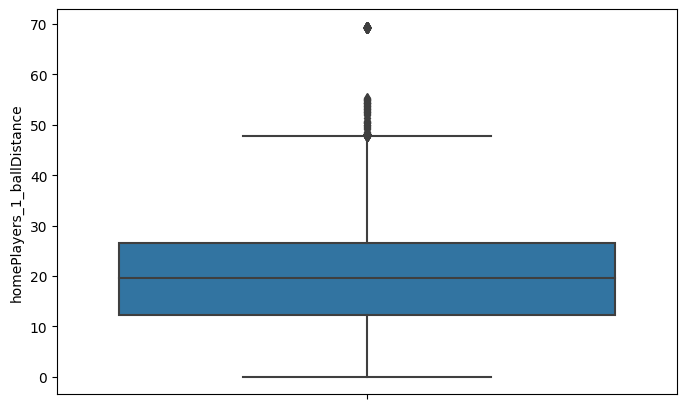

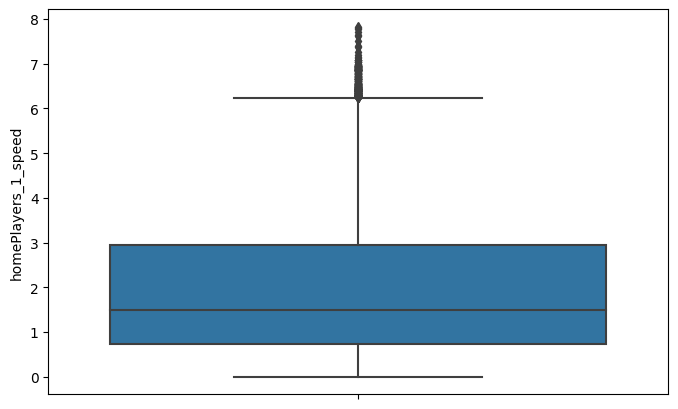

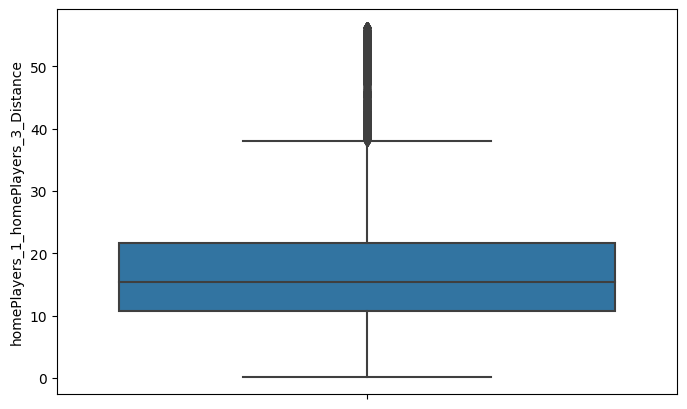

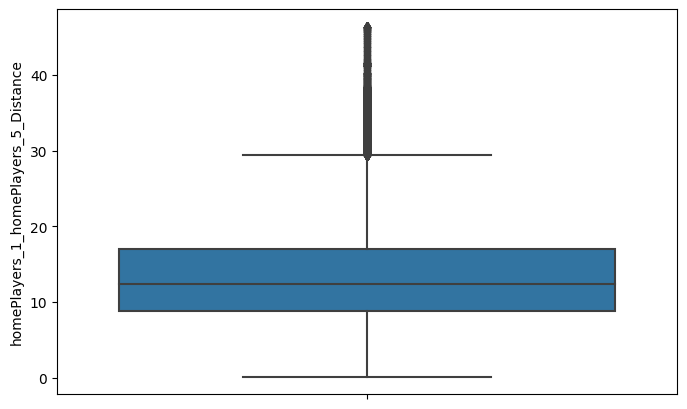

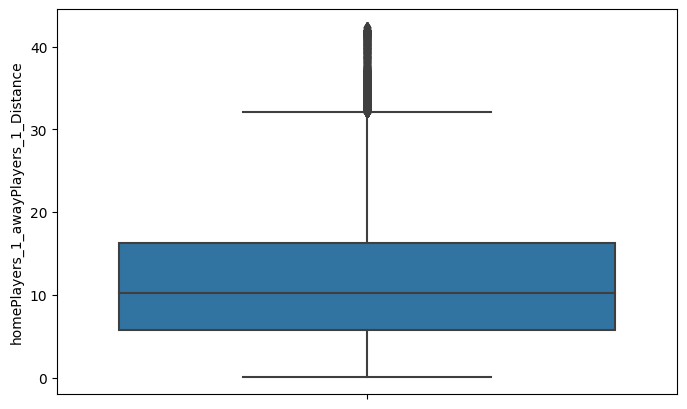

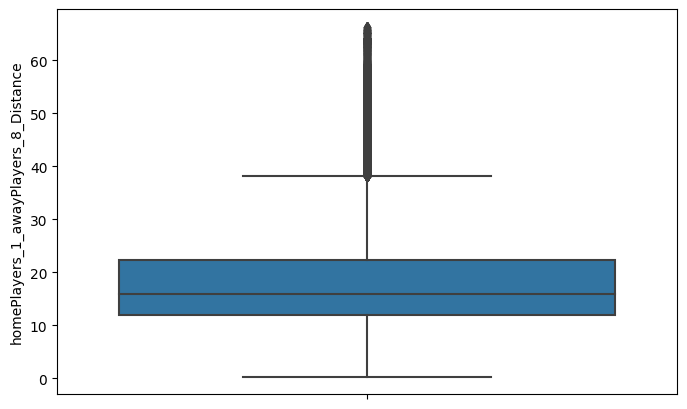

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cluster_df.columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(y=col, data=cluster_df)
  plt.show()

In [ ]:
def impute_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])
    return dataframe

In [ ]:
for col in cluster_df.columns:
  if "speed" in col:
    continue
  cluster_df = impute_outliers_iqr(cluster_df,col)

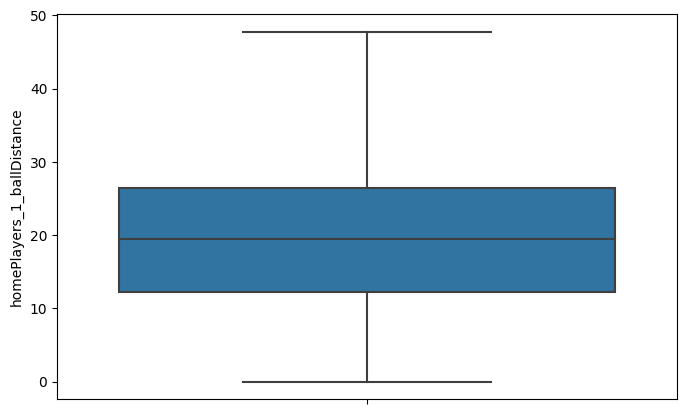

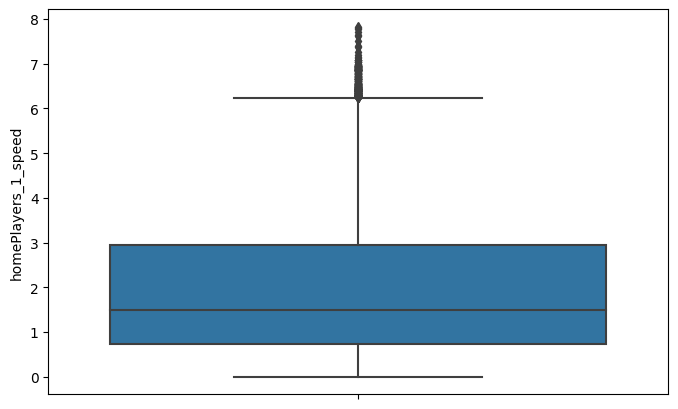

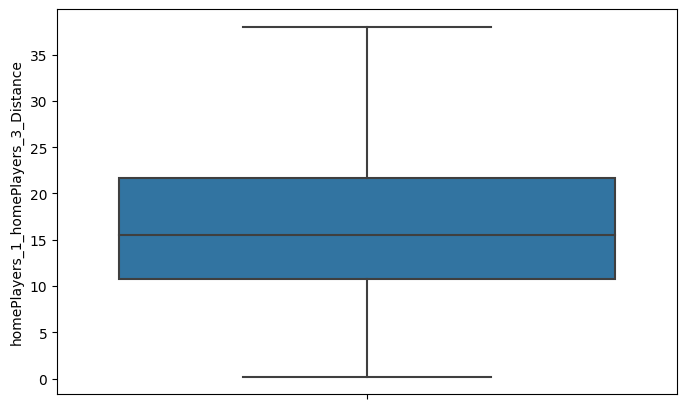

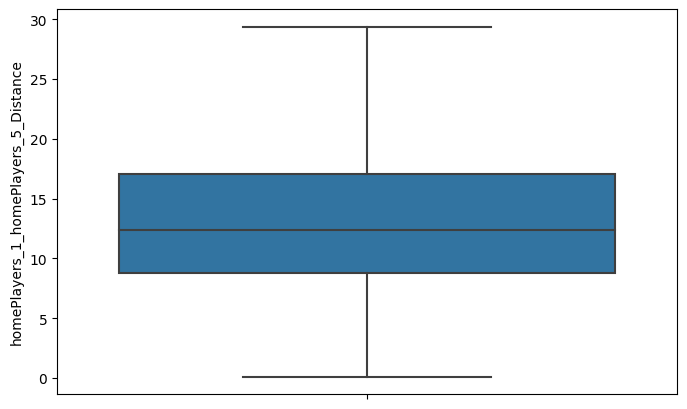

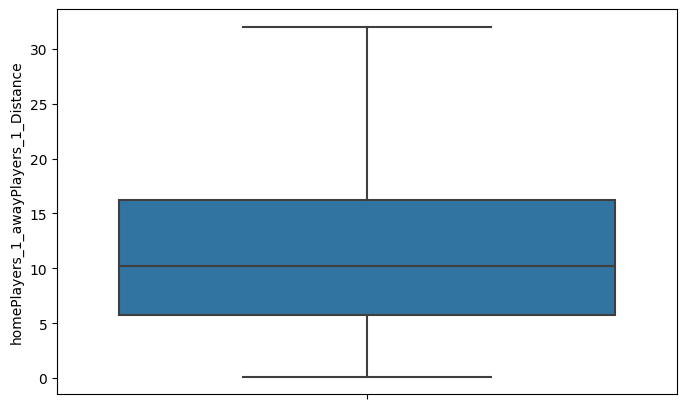

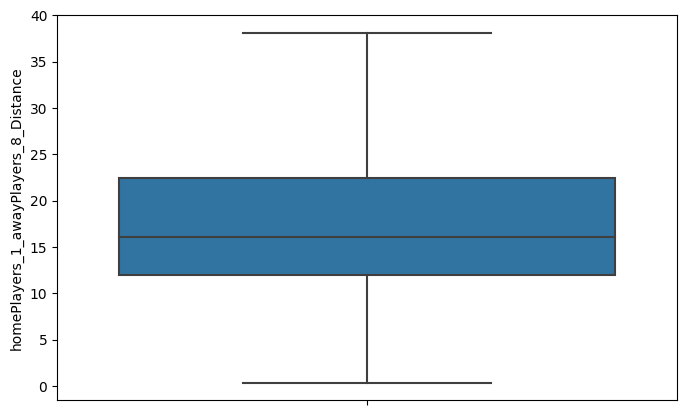

In [ ]:
for col in cluster_df.columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(y=col, data=cluster_df)
  plt.show()

**Inverse Distance from Away Player so that distance from home player is minimum and inverse of distance from away player is minimum. This allows clustering analysis to form clusters having low distance from home players and further distance from away players.**

In [ ]:
cluster_df["homePlayers_1_awayPlayers_1_Distance"] = cluster_df["homePlayers_1_awayPlayers_1_Distance"].apply(lambda x: 1/x)
cluster_df["homePlayers_1_awayPlayers_8_Distance"] = cluster_df["homePlayers_1_awayPlayers_8_Distance"].apply(lambda x: 1/x)

In [ ]:
print("Max Speed : {0}, Min Speed : {1}".format(max(cluster_df["homePlayers_1_speed"]), min(cluster_df["homePlayers_1_speed"])))

Max Speed : 7.83, Min Speed : 0.0


In [ ]:
try:
  cluster_df["homePlayers_1_speed"] = cluster_df["homePlayers_1_speed"].apply(lambda x: 1/x)
except ZeroDivisionError:
  cluster_df["homePlayers_1_speed"] = cluster_df["homePlayers_1_speed"].apply(lambda x: (1/(x+0.1)))

In [ ]:
cluster_df["homePlayers_1_homePlayers_3_Distance"] = cluster_df["homePlayers_1_homePlayers_3_Distance"].apply(lambda x: x/10)
cluster_df["homePlayers_1_homePlayers_5_Distance"] = cluster_df["homePlayers_1_homePlayers_5_Distance"].apply(lambda x: x/10)

In [ ]:
cluster_df.describe()

,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance
count,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000
mean,19.655946,1.467796,1.674774,1.341483,0.160732,0.077172
std,9.847248,2.241316,0.806801,0.637520,0.214483,0.088898
min,0.010000,0.126103,0.021587,0.011402,0.031214,0.026232
25%,12.273134,0.328947,1.078978,0.878390,0.061492,0.044620
50%,19.531476,0.625000,1.546414,1.240631,0.098142,0.062451
75%,26.478024,1.190476,2.168366,1.702484,0.174035,0.083761
max,47.785358,10.000000,3.802448,2.938626,7.980869,2.862992


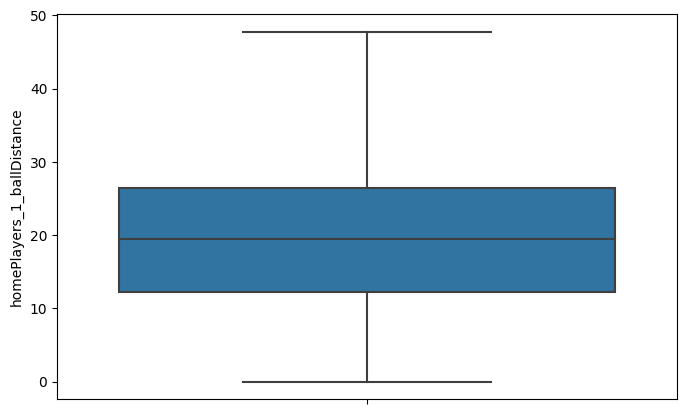

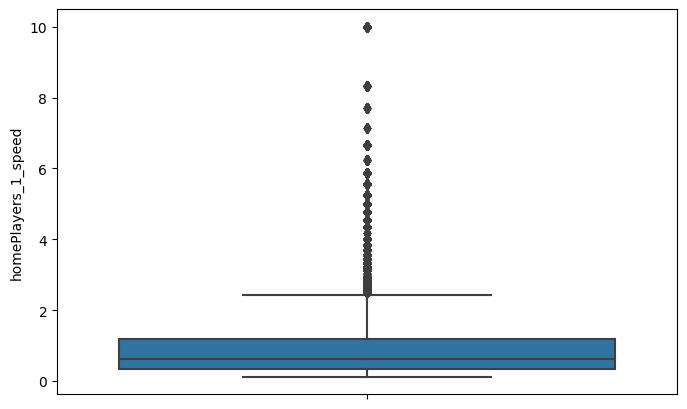

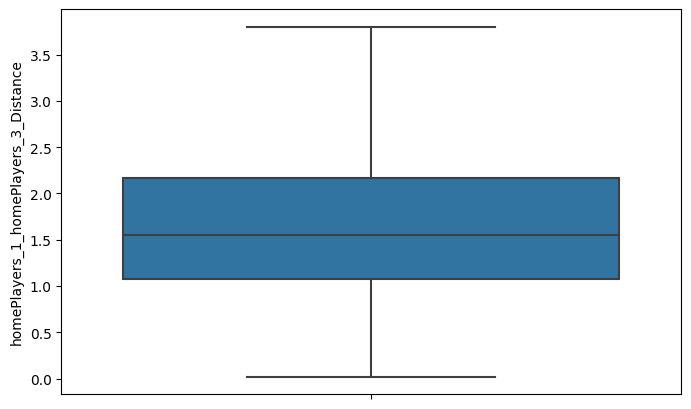

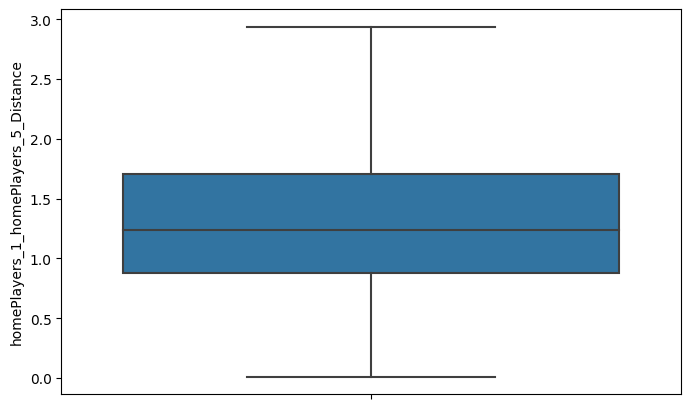

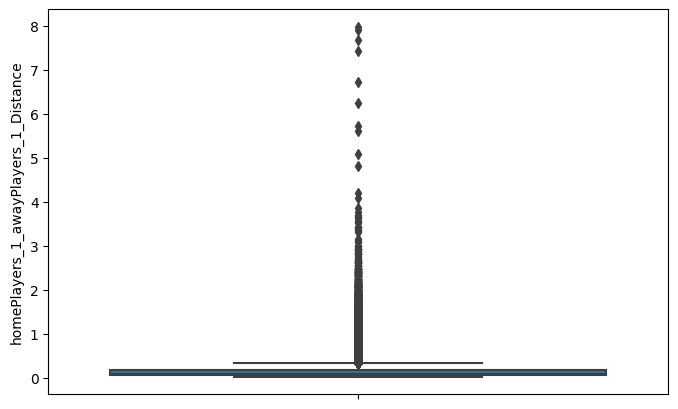

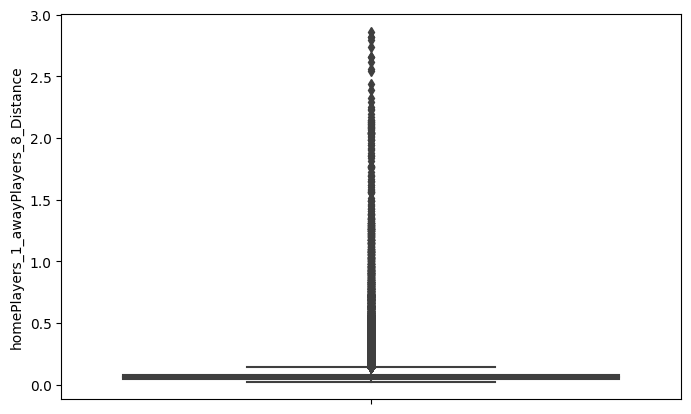

In [ ]:
for col in cluster_df.columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(y=col, data=cluster_df)
  plt.show()

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cluster_df)

**Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# wcss = []
# for k in range(1, 101):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_df)
#     wcss.append(kmeans.inertia_)
    
# # Plot the results
# plt.plot(range(1, 101), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
# wcss = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_df)
#     wcss.append(kmeans.inertia_)
    
# # Plot the results
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

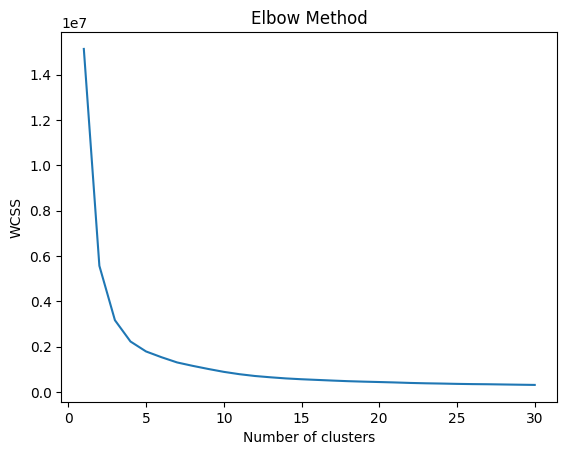

In [ ]:
wcss = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 31), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=5, random_state=42)
# kmeans.fit(scaled_df)
# labels = kmeans.labels_
# labels

In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette_avg = silhouette_score(scaled_df, labels)
# print('Silhouette score:', silhouette_avg)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_df)
labels = kmeans.labels_
labels

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(cluster_df, labels)
print('Silhouette score:', silhouette_avg)

Silhouette score: 0.40172254009660313


In [ ]:
cluster_df_copy = cluster_df.copy()
cluster_df_copy.head()

,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance
0,10.857260,10.000000,1.090491,1.838952,0.043541,0.038037
1,10.348435,10.000000,1.087931,1.838722,0.043512,0.038056
2,9.815141,1.587302,1.084609,1.837115,0.043515,0.038103
3,9.347347,1.428571,1.081293,1.836358,0.043500,0.038149
4,8.831308,1.351351,1.077208,1.834226,0.043534,0.038211


In [ ]:
cluster_df.columns

Index(['homePlayers_1_ballDistance', 'homePlayers_1_speed',
       'homePlayers_1_homePlayers_3_Distance',
       'homePlayers_1_homePlayers_5_Distance',
       'homePlayers_1_awayPlayers_1_Distance',
       'homePlayers_1_awayPlayers_8_Distance'],
      dtype='object')

In [ ]:
cluster_df_copy["Cluster"] = labels
cluster_df_copy.head()

,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance,Cluster
0,10.857260,10.000000,1.090491,1.838952,0.043541,0.038037,4
1,10.348435,10.000000,1.087931,1.838722,0.043512,0.038056,4
2,9.815141,1.587302,1.084609,1.837115,0.043515,0.038103,4
3,9.347347,1.428571,1.081293,1.836358,0.043500,0.038149,4
4,8.831308,1.351351,1.077208,1.834226,0.043534,0.038211,1


In [ ]:
columns_new = {'homePlayers_1_ballDistance': 'ballDis', 
               'homePlayers_1_speed': 'Speed', 
               'homePlayers_1_homePlayers_3_Distance': 'hp3Dis',
               'homePlayers_1_homePlayers_5_Distance': 'hp5Dis',
               'homePlayers_1_awayPlayers_1_Distance': 'ap1Dis',
               'homePlayers_1_awayPlayers_8_Distance': 'ap8Dis',}

In [ ]:
cluster_df_copy = cluster_df_copy.rename(columns=columns_new)

In [ ]:
cluster_df_copy.describe()

,ballDis,Speed,hp3Dis,hp5Dis,ap1Dis,ap8Dis,Cluster
count,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000,146818.000000
mean,19.655946,1.467796,1.674774,1.341483,0.160732,0.077172,2.202625
std,9.847248,2.241316,0.806801,0.637520,0.214483,0.088898,1.483648
min,0.010000,0.126103,0.021587,0.011402,0.031214,0.026232,0.000000
25%,12.273134,0.328947,1.078978,0.878390,0.061492,0.044620,1.000000
50%,19.531476,0.625000,1.546414,1.240631,0.098142,0.062451,3.000000
75%,26.478024,1.190476,2.168366,1.702484,0.174035,0.083761,4.000000
max,47.785358,10.000000,3.802448,2.938626,7.980869,2.862992,4.000000


In [ ]:
for i in range(5):
  print("Cluster {}".format(i))
  temp_df = cluster_df_copy[cluster_df_copy["Cluster"]==i]
  print(temp_df.describe())
  print("______________________________________________")

Cluster 0
            ballDis         Speed        hp3Dis        hp5Dis        ap1Dis  \
count  29926.000000  29926.000000  29926.000000  29926.000000  29926.000000   
mean      27.497536      1.764017      1.742974      1.408604      0.141436   
std        2.267929      2.431420      0.814303      0.658031      0.168317   
min       23.618171      0.158479      0.097944      0.065192      0.031214   
25%       25.551159      0.353357      1.138752      0.946610      0.053563   
50%       27.204133      0.800000      1.620032      1.274146      0.088049   
75%       29.415880      1.639344      2.324553      1.758424      0.161923   
max       31.914092     10.000000      3.802448      2.938626      2.258770   

             ap8Dis  Cluster  
count  29926.000000  29926.0  
mean       0.069707      0.0  
std        0.048253      0.0  
min        0.026232      0.0  
25%        0.046679      0.0  
50%        0.061686      0.0  
75%        0.078592      0.0  
max        1.407195      0.0  

In [ ]:
performance = {0:"Below Average",
               1:"Best",
               2:"Poor",
               3:"Average",
               4:"Good"}

In [ ]:
cluster_df_copy["Cluster"] = cluster_df_copy["Cluster"].replace(performance)

In [ ]:
filtered_df.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,awayPlayers_8_position,period,frameIdx,gameClock,wallClock,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance,homePlayers_1_x
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.08, 1.55, 0.0]",0.00,192194.0,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.54, 0.0]",...,MF,1.0,0.0,0.00,1.676119e+12,10.904907,18.389521,22.967081,26.290093,-11.08
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.08, 1.57, 0.0]",0.00,192194.0,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.52, 0.0]",...,MF,1.0,1.0,0.04,1.676119e+12,10.879311,18.387224,22.982100,26.277110,-11.08
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.07, 1.59, 0.0]",0.53,192194.0,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.71, 8.5, 0.0]",...,MF,1.0,2.0,0.08,1.676119e+12,10.846091,18.371154,22.980585,26.244378,-11.07
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.07, 1.61, 0.0]",0.60,192194.0,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.72, 8.48, 0.0]",...,MF,1.0,3.0,0.12,1.676119e+12,10.812927,18.363575,22.988736,26.213195,-11.07
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25.0,"[-11.05, 1.63, 0.0]",0.64,192194.0,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7.0,"[-2.72, 8.46, 0.0]",...,MF,1.0,4.0,0.16,1.676119e+12,10.772084,18.342260,22.970810,26.170594,-11.05


In [ ]:
filtered_df["Performance"] = cluster_df_copy["Cluster"]

In [ ]:
result = filtered_df[["period","gameClock","Performance"]]

In [ ]:
result["Performance"].value_counts().sort_values(ascending=False)

Average          38454
Good             37032
Below Average    29926
Best             22917
Poor             18489
Name: Performance, dtype: int64

In [ ]:
result.shape

(146818, 3)

In [ ]:
result.head(20)

,period,gameClock,Performance
0,1.0,0.00,Good
1,1.0,0.04,Good
2,1.0,0.08,Good
3,1.0,0.12,Good
4,1.0,0.16,Best
5,1.0,0.20,Best
6,1.0,0.24,Best
7,1.0,0.28,Best
8,1.0,0.32,Best
9,1.0,0.36,Best


**Combine Result With Original Dataframe of homeplayer 1**

In [ ]:
result["joinKey"] = result["period"].astype(str) + "_" + result["gameClock"].astype(str)
result.head()

,period,gameClock,Performance,joinKey
0,1.0,0.00,Good,1.0_0.0
1,1.0,0.04,Good,1.0_0.04
2,1.0,0.08,Good,1.0_0.08
3,1.0,0.12,Good,1.0_0.12
4,1.0,0.16,Best,1.0_0.16


In [ ]:
df_hp1["joinKey"] = df_hp1["period"].astype('float').astype(str) + "_" + df_hp1["gameClock"].astype(str)
df_hp1.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,period,frameIdx,gameClock,wallClock,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance,homePlayers_1_x,joinKey
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.55, 0.0]",0.00,192194,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.54, 0.0]",...,1,0,0.00,1676118667880,10.904907,18.389521,22.967081,26.290093,-11.08,1.0_0.0
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.57, 0.0]",0.00,192194,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.52, 0.0]",...,1,1,0.04,1676118667920,10.879311,18.387224,22.982100,26.277110,-11.08,1.0_0.04
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.59, 0.0]",0.53,192194,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.5, 0.0]",...,1,2,0.08,1676118667960,10.846091,18.371154,22.980585,26.244378,-11.07,1.0_0.08
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.61, 0.0]",0.60,192194,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.48, 0.0]",...,1,3,0.12,1676118668000,10.812927,18.363575,22.988736,26.213195,-11.07,1.0_0.12
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.05, 1.63, 0.0]",0.64,192194,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.46, 0.0]",...,1,4,0.16,1676118668040,10.772084,18.342260,22.970810,26.170594,-11.05,1.0_0.16


In [ ]:
final_df = pd.merge(df_hp1, result, on='joinKey', how='left')
final_df.head()

,homePlayers_1_playerId,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_speed,homePlayers_1_optaId,homePlayers_1_ballDistance,homePlayers_1_position,homePlayers_3_playerId,homePlayers_3_number,homePlayers_3_xyz,...,wallClock,homePlayers_1_homePlayers_3_Distance,homePlayers_1_homePlayers_5_Distance,homePlayers_1_awayPlayers_1_Distance,homePlayers_1_awayPlayers_8_Distance,homePlayers_1_x,joinKey,period_y,gameClock_y,Performance
0,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.55, 0.0]",0.00,192194,10.857260,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.54, 0.0]",...,1676118667880,10.904907,18.389521,22.967081,26.290093,-11.08,1.0_0.0,1.0,0.00,Good
1,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.08, 1.57, 0.0]",0.00,192194,10.348435,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.52, 0.0]",...,1676118667920,10.879311,18.387224,22.982100,26.277110,-11.08,1.0_0.04,1.0,0.04,Good
2,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.59, 0.0]",0.53,192194,9.815141,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.71, 8.5, 0.0]",...,1676118667960,10.846091,18.371154,22.980585,26.244378,-11.07,1.0_0.08,1.0,0.08,Good
3,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.07, 1.61, 0.0]",0.60,192194,9.347347,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.48, 0.0]",...,1676118668000,10.812927,18.363575,22.988736,26.213195,-11.07,1.0_0.12,1.0,0.12,Good
4,0746befc-a701-4b33-8faf-b3cccccf17bb,25,"[-11.05, 1.63, 0.0]",0.64,192194,8.831308,MF,1ab5dc11-1e32-4e6b-a385-5b736ec14763,7,"[-2.72, 8.46, 0.0]",...,1676118668040,10.772084,18.342260,22.970810,26.170594,-11.05,1.0_0.16,1.0,0.16,Best


In [ ]:
list(final_df.columns)

['homePlayers_1_playerId',
 'homePlayers_1_number',
 'homePlayers_1_xyz',
 'homePlayers_1_speed',
 'homePlayers_1_optaId',
 'homePlayers_1_ballDistance',
 'homePlayers_1_position',
 'homePlayers_3_playerId',
 'homePlayers_3_number',
 'homePlayers_3_xyz',
 'homePlayers_3_speed',
 'homePlayers_3_optaId',
 'homePlayers_5_playerId',
 'homePlayers_5_number',
 'homePlayers_5_xyz',
 'homePlayers_5_speed',
 'homePlayers_5_optaId',
 'homePlayers_3_ballDistance',
 'homePlayers_5_ballDistance',
 'homePlayers_3_position',
 'homePlayers_5_position',
 'awayPlayers_1_playerId',
 'awayPlayers_1_number',
 'awayPlayers_1_xyz',
 'awayPlayers_1_speed',
 'awayPlayers_1_optaId',
 'awayPlayers_8_playerId',
 'awayPlayers_8_number',
 'awayPlayers_8_xyz',
 'awayPlayers_8_speed',
 'awayPlayers_8_optaId',
 'awayPlayers_1_ballDistance',
 'awayPlayers_8_ballDistance',
 'awayPlayers_1_position',
 'awayPlayers_8_position',
 'period_x',
 'frameIdx',
 'gameClock_x',
 'wallClock',
 'homePlayers_1_homePlayers_3_Distance'

In [ ]:
final_cols = ['period_x',
              'gameClock_x',
              'homePlayers_1_number',
              'homePlayers_1_xyz',
              'homePlayers_1_ballDistance',
              'homePlayers_1_speed',
              'homePlayers_3_xyz',
              'homePlayers_1_homePlayers_3_Distance',
              'homePlayers_5_xyz',
              'homePlayers_1_homePlayers_5_Distance',
              'awayPlayers_1_xyz',
              'homePlayers_1_awayPlayers_1_Distance',
              'awayPlayers_8_xyz',
              'homePlayers_1_awayPlayers_8_Distance',
              'Performance']

In [ ]:
final_df = final_df[final_cols]
final_df.head()

,period_x,gameClock_x,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best


In [ ]:
final_df = final_df.rename(columns={'period_x':'period','gameClock_x':'gameClock'})
final_df.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best


In [ ]:
final_df["Performance"].value_counts()

Average          38454
Good             37032
Below Average    29926
Best             22917
Poor             18489
Name: Performance, dtype: int64

In [ ]:
final_df["Performance"].isna().sum()

4787

**First Half**

In [ ]:
final_df1 = final_df[final_df["period"]==1]
final_df1.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best


In [ ]:
final_df1["Performance"].value_counts().sort_values(ascending=False)

Average          19851
Good             19748
Best             14411
Below Average    13161
Poor              7647
Name: Performance, dtype: int64

In [ ]:
final_df2 = final_df[final_df["period"]==2]
final_df2.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance
76667,2,0.00,25,"[8.95, 4.13, 0.0]",10.330247,0.00,"[9.29, -10.76, 0.0]",14.893881,"[6.9, 11.42, 0.0]",7.572754,"[-0.14, 10.02, 0.0]",10.831445,"[-11.23, 0.01, 0.0]",20.596281,Good
76668,2,0.04,25,"[8.95, 4.16, 0.0]",10.602283,0.00,"[9.28, -10.75, 0.0]",14.913651,"[6.9, 11.42, 0.0]",7.543878,"[-0.13, 10.01, 0.0]",10.801338,"[-11.22, 0.02, 0.0]",20.590495,Good
76669,2,0.08,25,"[8.95, 4.18, 0.0]",10.953584,0.58,"[9.27, -10.74, 0.0]",14.923431,"[6.9, 11.41, 0.0]",7.515012,"[-0.12, 10.0, 0.0]",10.776702,"[-11.21, 0.05, 0.0]",20.578690,Good
76670,2,0.12,25,"[8.94, 4.21, 0.0]",11.333865,0.55,"[9.25, -10.72, 0.0]",14.933218,"[6.89, 11.41, 0.0]",7.486154,"[-0.11, 10.0, 0.0]",10.743677,"[-11.19, 0.07, 0.0]",20.551314,Good
76671,2,0.16,25,"[8.94, 4.22, 0.0]",11.845548,0.65,"[9.23, -10.71, 0.0]",14.932816,"[6.88, 11.41, 0.0]",7.479285,"[-0.1, 9.99, 0.0]",10.724481,"[-11.18, 0.09, 0.0]",20.539506,Good


In [ ]:
final_df2["Performance"].value_counts().sort_values(ascending=False)

Average          18603
Good             17284
Below Average    16765
Poor             10842
Best              8506
Name: Performance, dtype: int64

**5 minutes analysis**

In [ ]:
final_df1["gameClock"].max()

3066.64

In [ ]:
bins = [i for i in range(0,3300,300)]
bins

[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000]

In [ ]:
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','Extra-Time']
labels

['0-5',
 '5-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 'Extra-Time']

In [ ]:
final_df1["fiveMins"] = pd.cut(final_df1['gameClock'], bins=bins, labels=labels)
final_df1.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance,fiveMins
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good,NaN
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good,0-5
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good,0-5
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good,0-5
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best,0-5


<Figure size 1000x3000 with 0 Axes>

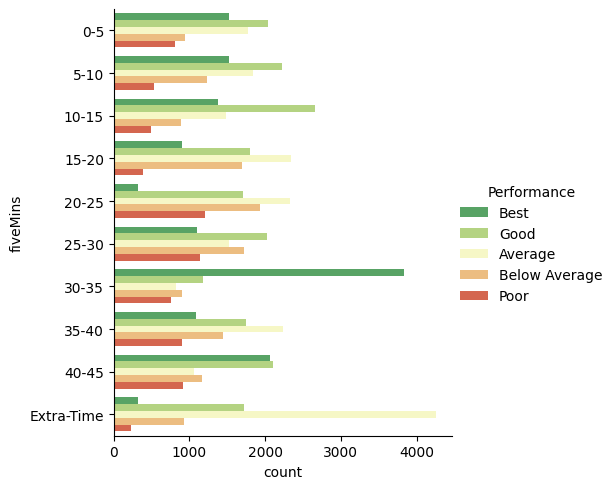

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = sns.color_palette("RdYlGn", n_colors=5)
color_palette = list(reversed(color_palette))
plt.figure(figsize=(10,30))
sns.catplot(y='fiveMins', kind='count', hue='Performance', data=final_df1, 
            order=labels, hue_order=['Best', 'Good', 'Average','Below Average','Poor'], palette=color_palette)
plt.show()

In [ ]:
final_df2.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance
76667,2,0.00,25,"[8.95, 4.13, 0.0]",10.330247,0.00,"[9.29, -10.76, 0.0]",14.893881,"[6.9, 11.42, 0.0]",7.572754,"[-0.14, 10.02, 0.0]",10.831445,"[-11.23, 0.01, 0.0]",20.596281,Good
76668,2,0.04,25,"[8.95, 4.16, 0.0]",10.602283,0.00,"[9.28, -10.75, 0.0]",14.913651,"[6.9, 11.42, 0.0]",7.543878,"[-0.13, 10.01, 0.0]",10.801338,"[-11.22, 0.02, 0.0]",20.590495,Good
76669,2,0.08,25,"[8.95, 4.18, 0.0]",10.953584,0.58,"[9.27, -10.74, 0.0]",14.923431,"[6.9, 11.41, 0.0]",7.515012,"[-0.12, 10.0, 0.0]",10.776702,"[-11.21, 0.05, 0.0]",20.578690,Good
76670,2,0.12,25,"[8.94, 4.21, 0.0]",11.333865,0.55,"[9.25, -10.72, 0.0]",14.933218,"[6.89, 11.41, 0.0]",7.486154,"[-0.11, 10.0, 0.0]",10.743677,"[-11.19, 0.07, 0.0]",20.551314,Good
76671,2,0.16,25,"[8.94, 4.22, 0.0]",11.845548,0.65,"[9.23, -10.71, 0.0]",14.932816,"[6.88, 11.41, 0.0]",7.479285,"[-0.1, 9.99, 0.0]",10.724481,"[-11.18, 0.09, 0.0]",20.539506,Good


In [ ]:
final_df2["gameClock"].max()

2997.48

In [ ]:
bins2 = [i for i in range(0,3000,300)]
bins2

[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700]

In [ ]:
labels2 = ['45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90']
labels2

['45-50',
 '50-55',
 '55-60',
 '60-65',
 '65-70',
 '70-75',
 '75-80',
 '80-85',
 '85-90']

In [ ]:
final_df2["fiveMins"] = pd.cut(final_df2['gameClock'], bins=bins2, labels=labels2)
final_df2.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance,fiveMins
76667,2,0.00,25,"[8.95, 4.13, 0.0]",10.330247,0.00,"[9.29, -10.76, 0.0]",14.893881,"[6.9, 11.42, 0.0]",7.572754,"[-0.14, 10.02, 0.0]",10.831445,"[-11.23, 0.01, 0.0]",20.596281,Good,NaN
76668,2,0.04,25,"[8.95, 4.16, 0.0]",10.602283,0.00,"[9.28, -10.75, 0.0]",14.913651,"[6.9, 11.42, 0.0]",7.543878,"[-0.13, 10.01, 0.0]",10.801338,"[-11.22, 0.02, 0.0]",20.590495,Good,45-50
76669,2,0.08,25,"[8.95, 4.18, 0.0]",10.953584,0.58,"[9.27, -10.74, 0.0]",14.923431,"[6.9, 11.41, 0.0]",7.515012,"[-0.12, 10.0, 0.0]",10.776702,"[-11.21, 0.05, 0.0]",20.578690,Good,45-50
76670,2,0.12,25,"[8.94, 4.21, 0.0]",11.333865,0.55,"[9.25, -10.72, 0.0]",14.933218,"[6.89, 11.41, 0.0]",7.486154,"[-0.11, 10.0, 0.0]",10.743677,"[-11.19, 0.07, 0.0]",20.551314,Good,45-50
76671,2,0.16,25,"[8.94, 4.22, 0.0]",11.845548,0.65,"[9.23, -10.71, 0.0]",14.932816,"[6.88, 11.41, 0.0]",7.479285,"[-0.1, 9.99, 0.0]",10.724481,"[-11.18, 0.09, 0.0]",20.539506,Good,45-50


<Figure size 1000x3000 with 0 Axes>

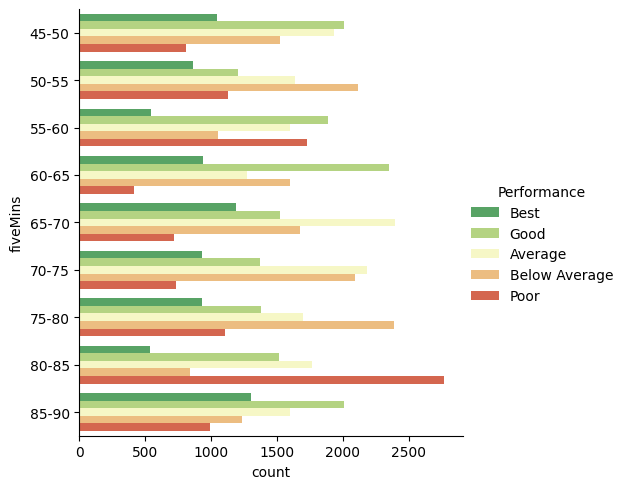

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = sns.color_palette("RdYlGn", n_colors=5)
color_palette = list(reversed(color_palette))
plt.figure(figsize=(10,30))
sns.catplot(y='fiveMins', kind='count', hue='Performance', data=final_df2, 
            order=labels2, hue_order=['Best', 'Good', 'Average','Below Average','Poor'], palette=color_palette)
plt.show()

In [ ]:
result_df = pd.concat([final_df1, final_df2], axis=0)
print(result_df.shape)
result_df.head()

(151605, 16)


,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance,fiveMins
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good,NaN
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good,0-5
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good,0-5
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good,0-5
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best,0-5


In [ ]:
def get_y(pos):
  y = ast.literal_eval(pos)[1]
  return y

In [ ]:
result_df["homePlayers_1_x"] = result_df["homePlayers_1_xyz"].apply(get_x)
result_df["homePlayers_1_y"] = result_df["homePlayers_1_xyz"].apply(get_y)

In [ ]:
result_df.head()

,period,gameClock,homePlayers_1_number,homePlayers_1_xyz,homePlayers_1_ballDistance,homePlayers_1_speed,homePlayers_3_xyz,homePlayers_1_homePlayers_3_Distance,homePlayers_5_xyz,homePlayers_1_homePlayers_5_Distance,awayPlayers_1_xyz,homePlayers_1_awayPlayers_1_Distance,awayPlayers_8_xyz,homePlayers_1_awayPlayers_8_Distance,Performance,fiveMins,homePlayers_1_x,homePlayers_1_y
0,1,0.00,25,"[-11.08, 1.55, 0.0]",10.857260,0.00,"[-2.71, 8.54, 0.0]",10.904907,"[-1.2, -13.96, 0.0]",18.389521,"[11.04, -4.63, 0.0]",22.967081,"[14.89, 5.64, 0.0]",26.290093,Good,NaN,-11.08,1.55
1,1,0.04,25,"[-11.08, 1.57, 0.0]",10.348435,0.00,"[-2.71, 8.52, 0.0]",10.879311,"[-1.22, -13.95, 0.0]",18.387224,"[11.05, -4.63, 0.0]",22.982100,"[14.88, 5.64, 0.0]",26.277110,Good,0-5,-11.08,1.57
2,1,0.08,25,"[-11.07, 1.59, 0.0]",9.815141,0.53,"[-2.71, 8.5, 0.0]",10.846091,"[-1.24, -13.93, 0.0]",18.371154,"[11.05, -4.64, 0.0]",22.980585,"[14.86, 5.64, 0.0]",26.244378,Good,0-5,-11.07,1.59
3,1,0.12,25,"[-11.07, 1.61, 0.0]",9.347347,0.60,"[-2.72, 8.48, 0.0]",10.812927,"[-1.27, -13.92, 0.0]",18.363575,"[11.05, -4.65, 0.0]",22.988736,"[14.83, 5.65, 0.0]",26.213195,Good,0-5,-11.07,1.61
4,1,0.16,25,"[-11.05, 1.63, 0.0]",8.831308,0.64,"[-2.72, 8.46, 0.0]",10.772084,"[-1.29, -13.9, 0.0]",18.342260,"[11.04, -4.67, 0.0]",22.970810,"[14.81, 5.65, 0.0]",26.170594,Best,0-5,-11.05,1.63


In [ ]:
result_df_best = result_df[result_df["Performance"]=="Best"]

In [ ]:
sns.kdeplot(data=result_df_best, x='homePlayers_1_x', y='homePlayers_1_y', fill=True, cmap="Blues", thresh=0.05)
plt.xlabel("Length of field")
plt.ylabel("Width of field")
plt.title("Best performance regions for home player 1")
plt.show()

In [ ]:
result_df_poor = result_df[result_df["Performance"]=="Poor"]

In [ ]:
sns.kdeplot(data=result_df_poor, x='homePlayers_1_x', y='homePlayers_1_y', fill=True, cmap="Blues", thresh=0.05)
plt.xlabel("Length of field")
plt.ylabel("Width of field")
plt.title("Poor performance regions for home player 1")
plt.show()

In [ ]:
result_df.to_csv("/content/drive/My Drive/MCI Women_s Files/HomePlayer1_MF_Analysis_Result.csv",index=False)